In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Read the data
df = pd.read_csv(r"D:\Internship\MILESTONE_1\data.csv", encoding='latin-1', 
    low_memory=False)

In [4]:
#TOP 5 data
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
# Last 5 data
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(435742, 13)

In [7]:
# Rows and Columns of DataSet
data_shape=df.shape

rows= data_shape[0]
columns= data_shape[1]

print(f'"No of Rows and Columns :" \n "Rows :" {rows} "Columns :" {columns}')

"No of Rows and Columns :" 
 "Rows :" 435742 "Columns :" 13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [10]:
# Finding percentage of missing value 
percent=df.isnull().sum()/rows*100
print(percent)

stn_code                       33.064749
sampling_date                   0.000688
state                           0.000000
location                        0.000688
agency                         34.304933
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
location_monitoring_station     6.309009
pm2_5                          97.862497
date                            0.001606
dtype: float64


In [11]:
# Finding Duplicate value 
duplicate=df.duplicated().sum()
print(duplicate)

674


In [12]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

stn_code
193    1428
519    1280
708    1273
541    1270
710    1269
       ... 
53        2
209       1
275       1
207       1
224       1
Name: count, Length: 745, dtype: int64
******************************
sampling_date
19-03-15     253
12-02-15     237
19-02-15     236
05-11-15     235
11-11-15     234
            ... 
27/4/2012      1
28/4/2012      1
18/5/2012      1
19/5/2012      1
11/6/1987      1
Name: count, Length: 5485, dtype: int64
******************************
state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                     

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
so2,401096.0,10.829414,11.177187,0.0,5.0,8.0,13.7,909.000000
no2,419509.0,25.809623,18.503086,0.0,14.0,22.0,32.2,876.000000
rspm,395520.0,108.832784,74.872430,0.0,56.0,90.0,142.0,6307.033333
spm,198355.0,220.783480,151.395457,0.0,111.0,187.0,296.0,3380.000000
pm2_5,9314.0,40.791467,30.832525,3.0,24.0,32.0,46.0,504.000000


In [14]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


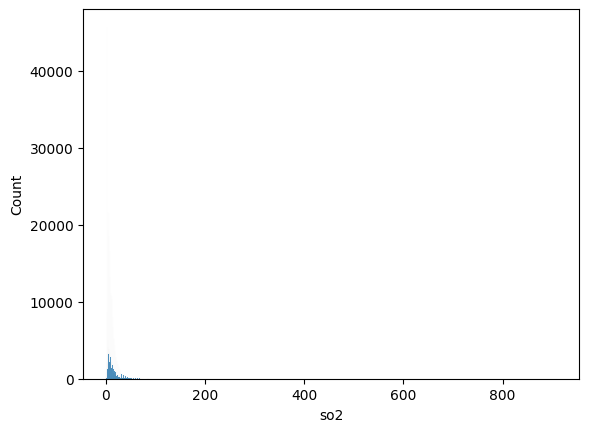

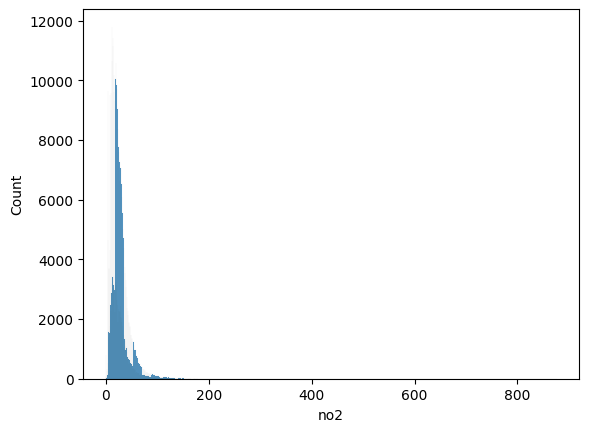

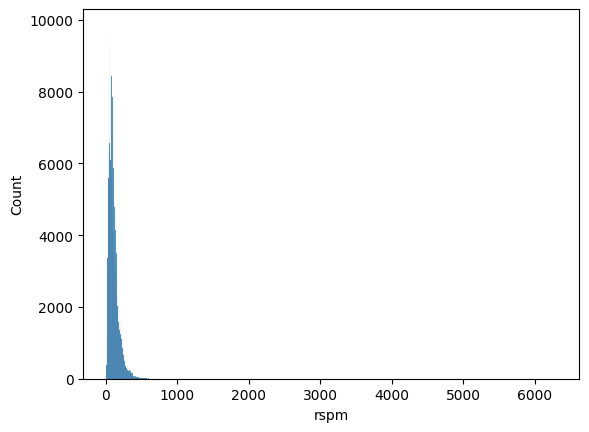

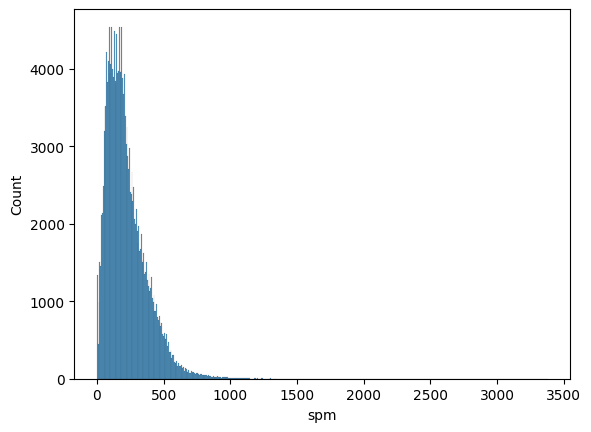

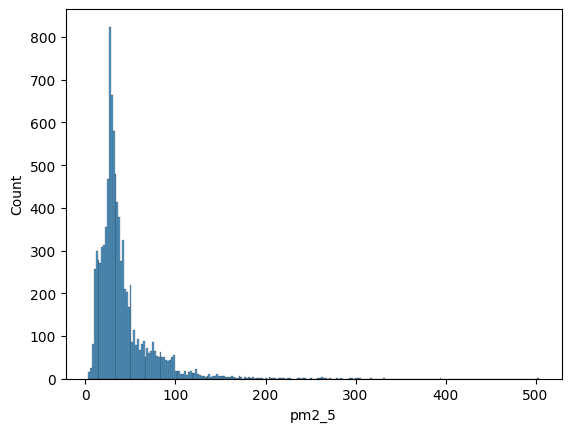

In [15]:
#Histogram to understand Distribution
import warnings 
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [16]:
s=df.select_dtypes(include="number").corr()

<Axes: >

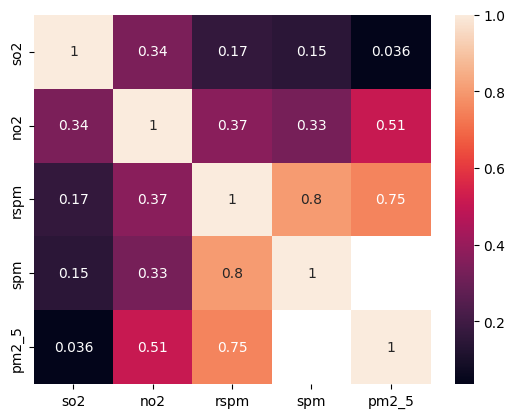

In [17]:
sns.heatmap(s,annot=True)

In [18]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [20]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
# 1. Select all numeric columns (the entire feature matrix)
numeric_cols = df.select_dtypes(include="number").columns

# 2. Apply KNNImputer to the entire matrix at once
# The imputer will look across all features (columns) to find the best K-Nearest Neighbors
df[numeric_cols] = impute.fit_transform(df[numeric_cols])

# 3. Check for missing values after imputation
df.isnull().sum()